In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
# Question 2
u0=149.8
s=12.3
n=30
xbar=156.3
z = (xbar-u0)/(s/np.sqrt(n))
print(round(z,3))

2.894


In [6]:
# Question 3 
# H0 : µ = 31.9
# HA : µ > 31.9
z = 1.28
# we wanna get p(Z>z)
prob = stats.norm.cdf(-z)
alpha=0.05
print(prob<alpha)
# we cant reject H0 because the result is not significant

False


In [17]:
# Question 4
# To test the hypothesis that eating fish makes one smarter, a random sample of 12 people take a fish oil supplement
# for one year and then are given an IQ test. After taking fish supplements for one year their IQ's are as follows:

# [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]

# Perform a t-test to assess whether their IQ was greater than average (average IQ is 100). 
# What do you conclude? (Use α=0.01 )
alpha=0.01
x=[116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
n=12
xbar = np.mean(x)
s = np.std(x,ddof=1) 
u0 = 100
t = (xbar-u0)/(s/np.sqrt(n))
print(t)

2.353393621658208


In [18]:
prob =1- stats.t.cdf(t,n-1)
print(prob)

0.019128732387258873


In [19]:
print(prob<alpha)
# the result is not significant we accept the H0

False


In [24]:
# Question 5
# A company manufacturing diet pills wants to test the effectiveness of their product.
# They set up a clinical trial and give 15 participants the diet pill and 10 participants a placebo.
# The weight loss (in kg) for each participant is as follow:

drug = [2, 6, 10, 19, 15, 3, 8, 9, 0, 7, 5, 12]

placebo = [5, 0, 4, 9, 1, 1, 2, 0, 6, 7]

# Perform a two sample t-test to assess whether the drug affects weight loss. What do you conclude? (Use α=0.05 )
# H0 says the drug and the placebo arent different
# Ha says the placebo and the drug are different


In [25]:
alpha=0.05
ttest2 = stats.ttest_ind(drug,placebo)
print(ttest2.pvalue<alpha)
# The results indicate that there is sufficient evidence to reject the null hypothesis

True


In [62]:
#Question 6,7
import statsmodels.formula.api as smf

# Question 6 
# For the height versus weight data considered in the lab sheet, what is the 95% confidence 
# interval for the slope parameter? (Rounded to 2 decimal places)
df = pd.read_csv('height-weight.csv')

model = smf.ols(formula='Weight~Height',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     550.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           5.51e-42
Time:                        14:12:24   Log-Likelihood:                -318.69
No. Observations:                 100   AIC:                             641.4
Df Residuals:                      98   BIC:                             646.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -149.2236      9.432    -15.821      0.0

In [63]:
#Question 8

print(df['Height'].max()>175)

True


Text(0, 0.5, 'Weight (kg)')

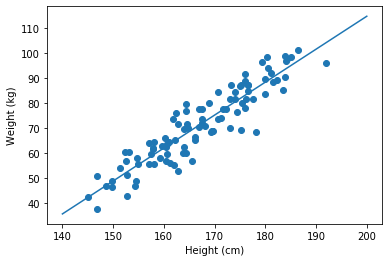

In [69]:
xrange = np.linspace(140,200)
plt.plot(xrange,model.params.Intercept+model.params.Height*xrange)
plt.scatter(df.Height,df.Weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

In [70]:
# Question 9 
# For the cars dataset, what is the coefficient of determination for the linear regression model? 
df = pd.read_csv('cars.csv')

model = smf.ols(formula='Price~MPG',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     227.5
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           3.79e-39
Time:                        14:17:54   Log-Likelihood:                -3628.7
No. Observations:                 320   AIC:                             7261.
Df Residuals:                     318   BIC:                             7269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.608e+05   6549.632     24.549      0.0

In [76]:
# Question 10
# For the cars dataset, can we use the fitted regression line to predict the recommended retail
# price of a car whose miles per gallon is 35?
print(df['MPG'].min()<35 and df['MPG'].max()>35)

True


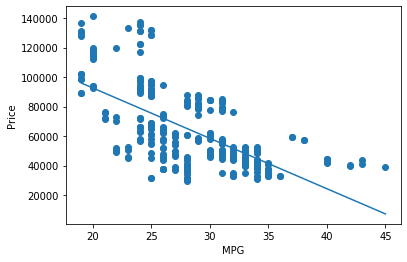

In [77]:
# Question 11
# For the cars dataset, does the spread of the residuals depend on the miles per gallon?

plt.scatter(df.MPG,df.Price)
xrange = np.linspace(df['MPG'].min(),df['MPG'].max())
plt.xlabel('MPG')
plt.ylabel('Price')
plt.plot(xrange,model.params.Intercept+model.params.MPG*xrange)

In [78]:
# Question 12 
# For the cars dataset, what is the correlation coefficient between miles per gallon and recommended retail price?
df.corr()

,MPG,Price
MPG,1.000000,-0.645762
Price,-0.645762,1.000000
